# **Image Classification using CNN**

### **Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### **Data preprocessing**

In [2]:
data_path = './Dataset/256_ObjectCategories'

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25

### **Preprocessing the Training set**

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    shuffle =True,
    image_size= IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=False
)

Found 30608 files belonging to 257 classes.


### **Preprocessing the Test set**

In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    shuffle =True,
    image_size=IMAGE_SIZE,
    batch_size=32,
    validation_split=0.30,
    subset = "validation",
    seed = 89
)

Found 30608 files belonging to 257 classes.
Using 9182 files for validation.


### **Ploting Sample Images**

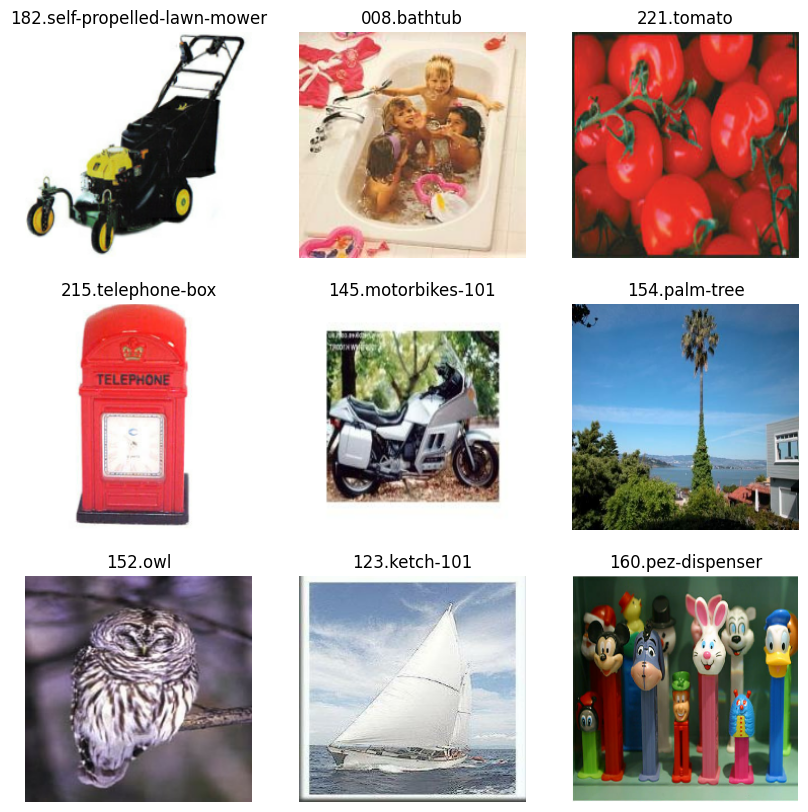

In [44]:
data_category = train_data.class_names

plt.figure(figsize=(10,10))
for image, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

## Building the CNN

### Initialising the CNN

In [13]:
cnn_model = Sequential([layers.Rescaling(1./255)])

### **Adding a convolutional layer**

In [14]:
cnn_model.add(layers.Conv2D(filters = 16, kernel_size =3, padding='same', activation='relu'))

### **Pooling**

In [15]:
cnn_model.add(layers.MaxPool2D())

### **Adding a Second convolutional layer**

In [16]:
cnn_model.add(layers.Conv2D(filters = 32, kernel_size =3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPool2D())

### **Adding a Third convolutional layer**

In [17]:
cnn_model.add(layers.Conv2D(filters = 64, kernel_size =3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPool2D())

### **Adding a Fourth convolutional layer**

In [18]:
cnn_model.add(layers.Conv2D(filters = 128, kernel_size =3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPool2D())

### **Flattening**

In [19]:
cnn_model.add(layers.Flatten())

### **Full Connection**

In [20]:
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(units=128, activation='relu'))

### **Output Layer**

In [21]:
cnn_model.add(layers.Dense(len(data_category)))

## **Training the CNN model**

### **Compiling the model**

In [22]:
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### **Training the CNN on the Training set and evaluating it on the Test set**

In [23]:
history = cnn_model.fit(train_data,
                        validation_data = test_data,
                        epochs=EPOCHS)

Epoch 1/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 542s 561ms/step - accuracy: 0.0576 - loss: 5.2752 - val_accuracy: 0.1709 - val_loss: 4.2283
Epoch 2/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 522s 545ms/step - accuracy: 0.1705 - loss: 4.2098 - val_accuracy: 0.2804 - val_loss: 3.4864
Epoch 3/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 525s 548ms/step - accuracy: 0.2610 - loss: 3.5519 - val_accuracy: 0.3718 - val_loss: 2.8853
Epoch 4/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 633s 662ms/step - accuracy: 0.3398 - loss: 3.0314 - val_accuracy: 0.4535 - val_loss: 2.4198
Epoch 5/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 586s 612ms/step - accuracy: 0.4129 - loss: 2.5915 - val_accuracy: 0.5102 - val_loss: 2.0837
Epoch 6/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 580s 606ms/step - accuracy: 0.4810 - loss: 2.1993 - val_accuracy: 0.5877 - val_loss: 1.6752
Epoch 7/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 661s 690ms/step - accuracy: 0.5497 - loss: 1.8356 - val_accuracy: 0.6322 - val_loss: 1.4551
Epoch 8/25
957/957 ━━━━━━━━━━━━━━━━━━━━ 737s 769ms/step - accuracy: 0.6014 -

### **Checking the Accuracy of the Model**

In [24]:
loss, accuracy = cnn_model.evaluate(test_data)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

287/287 ━━━━━━━━━━━━━━━━━━━━ 48s 167ms/step - accuracy: 0.8675 - loss: 0.4723
Validation Loss: 0.4693145751953125
Validation Accuracy: 0.8703985810279846


Text(0.5, 1.0, 'Loss')

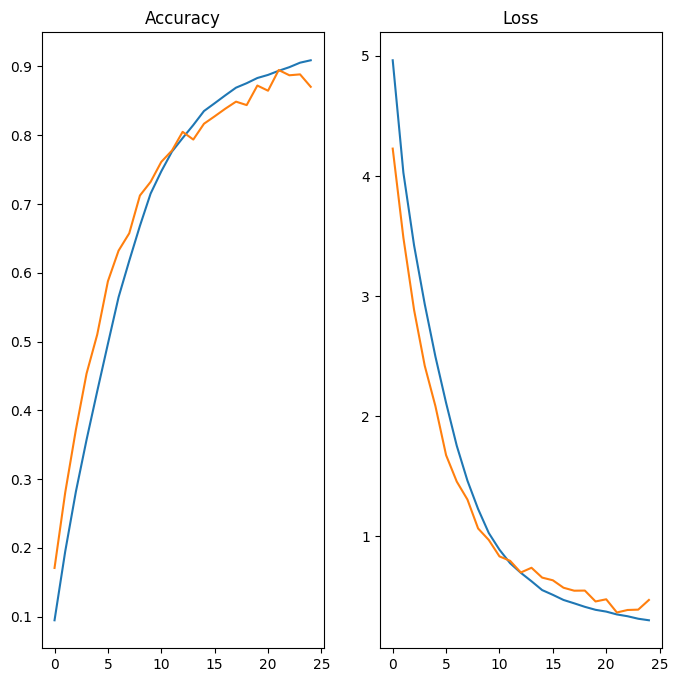

In [25]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

### **Making a single prediction**

In [38]:
image = 'C:/Users/admin/Downloads/download_cd.jpg'
img_load = tf.keras.utils.load_img(image, target_size=IMAGE_SIZE)
img_arr = tf.keras.utils.array_to_img(img_load)
img_batch = tf.expand_dims(img_arr, 0)

In [39]:
predict = cnn_model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [40]:
score = tf.nn.softmax(predict)

In [41]:
class_name = data_category[np.argmax(score)].split(".")

In [42]:
print('The above Image is {}'.format(class_name[1]))

The above Image is cd


### **Saving the model**

In [43]:
cnn_model.save("image_classification_model.keras")